In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('/content/spam.csv', encoding="latin1")

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.rename(columns={'v1':'target','v2':'Messages'},inplace=True)

In [10]:
df.isnull().sum()

,0
target,0
Messages,0


In [11]:
df.duplicated().sum()

np.int64(403)

In [12]:
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df

,target,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])

In [16]:
df

,target,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


#EDA
- imbalance data

In [17]:
df.head()

,target,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

,count
target,
0,4516
1,653


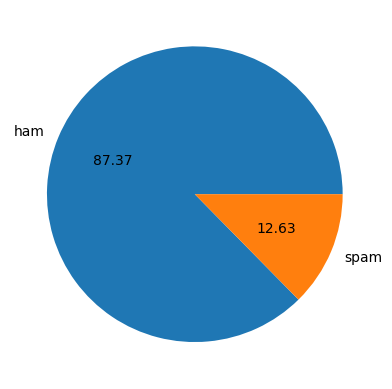

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
df['length_text']=df['Messages'].apply(len)

In [23]:
df['Messages'].apply(lambda x:nltk.word_tokenize(x))

,Messages
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [24]:
# we will find not of words used in each text
# nltk.word_tokenize(x) it extracts each word from the message like  [i,am,devang]
df['No_words']=df['Messages'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df['sentences']=df['Messages'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df

,target,Messages,length_text,No_words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [27]:
df[['No_words','sentences','length_text']].describe()

,No_words,sentences,length_text
count,5169.000000,5169.000000,5169.000000
mean,18.455794,1.965564,78.977945
std,13.324758,1.448541,58.236293
min,1.000000,1.000000,2.000000
25%,9.000000,1.000000,36.000000
50%,15.000000,1.000000,60.000000
75%,26.000000,2.000000,117.000000
max,220.000000,38.000000,910.000000


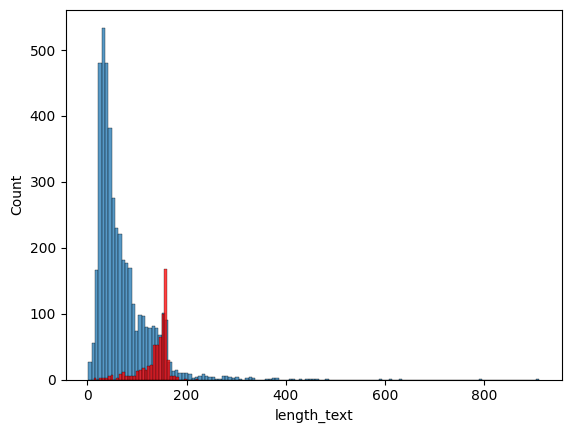

In [28]:
sns.histplot(df[df['target']==0]['length_text'])
sns.histplot(df[df['target']==1]['length_text'],color='red')
plt.show()

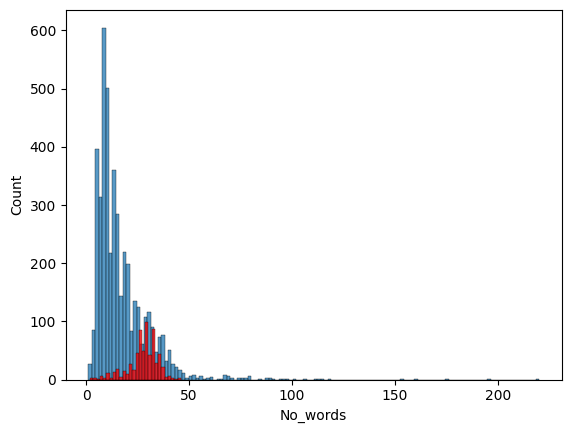

In [29]:
sns.histplot(df[df['target']==0]['No_words'])
sns.histplot(df[df['target']==1]['No_words'],color='red')
plt.show()

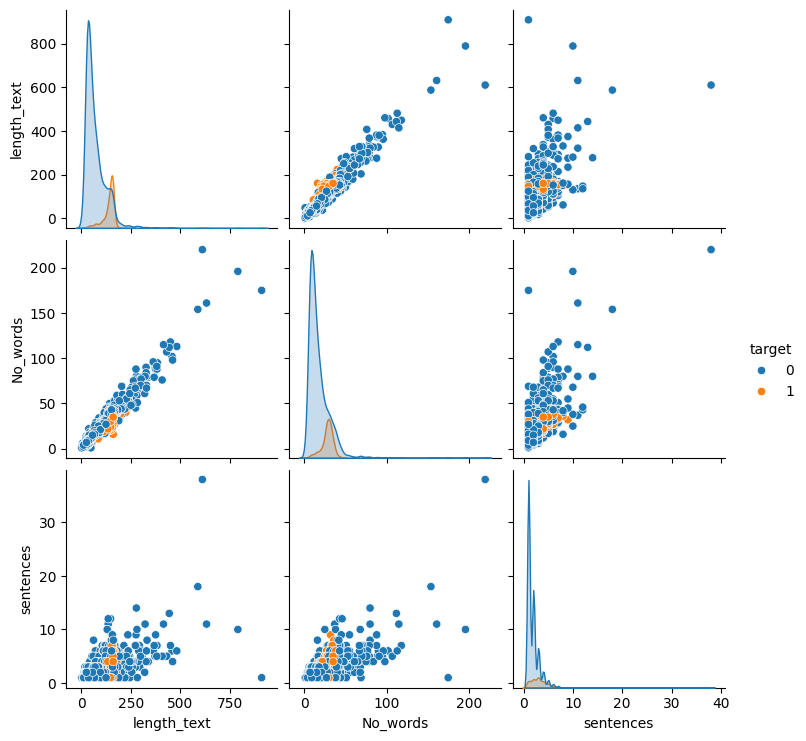

In [30]:
sns.pairplot(df,hue='target')

In [31]:
df.corr(numeric_only=True)

,target,length_text,No_words,sentences
target,1.000000,0.384717,0.262912,0.263939
length_text,0.384717,1.000000,0.965760,0.624139
No_words,0.262912,0.965760,1.000000,0.679971
sentences,0.263939,0.624139,0.679971,1.000000


# here:
- we will keep only length_text as it has good corr
- and we will take only 1 col as col's has a lot of multi correlation

<Axes: >

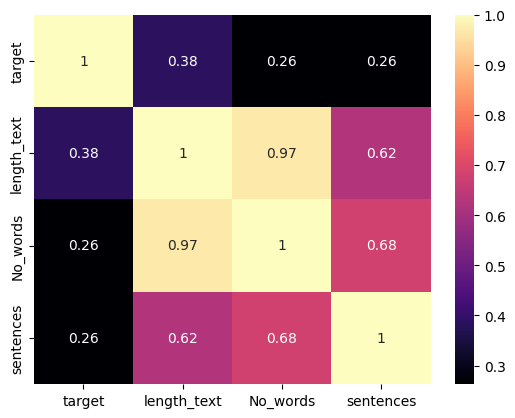

In [32]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='magma')

- lower case
- tokenize
- remove special char
- remve stop word and punc
- stemming

In [33]:
# stop words tells all the stop words in english
# punctations to remove them
# stemming to get words in raw form like:loving=lov
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def transform_test(text):
  text=text.lower()
  # becomes a list after this
  text=nltk.word_tokenize(text)
  text2=[]
  for i in text:
    # only letters and words and no's are filtered and appended
    if i.isalnum():
      text2.append(i)
  text=text2[:]
  text2.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      text2.append(i)
  text=text2[:]
  text2.clear()
  for i in text:
    text2.append(ps.stem(i))
# to convert list to txt sentence again
  return " ".join(text2)

In [35]:
transform_test(df['Messages'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [36]:
df['Transformed_text']=df['Messages'].apply(transform_test)

In [37]:
df.head(5)

,target,Messages,length_text,No_words,sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
# we will create wordcloud
# what it does it highites the most recurring or imp words

In [39]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [40]:
# here we are making a wordcloud for spam messages only
spam_wc=wc.generate(df[df['target']==1]['Transformed_text'].str.cat(sep=' '))

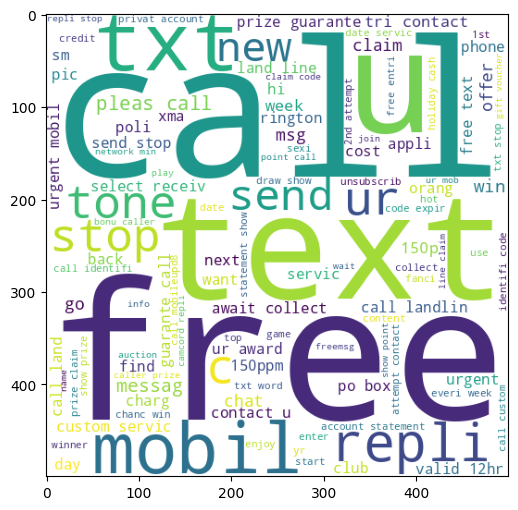

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [42]:
ham_wc=wc.generate(df[df['target']==0]['Transformed_text'].str.cat(sep=' '))

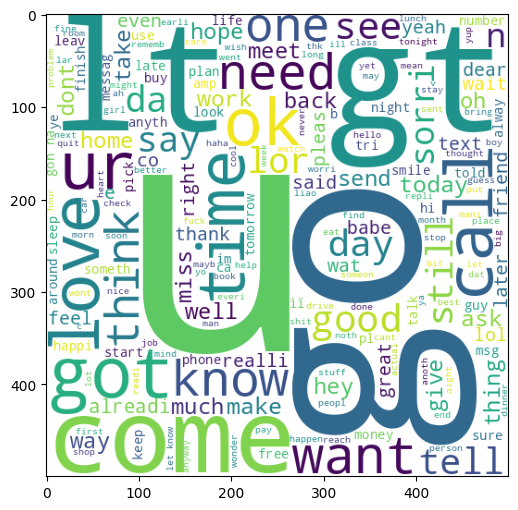

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [44]:
# to find top 30 words in both
spam_collec=[]
for i in df[df['target']==1]['Transformed_text'].tolist():
  for j in i.split():
    spam_collec.append(j)


In [45]:
from collections import Counter
Counter(spam_collec).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

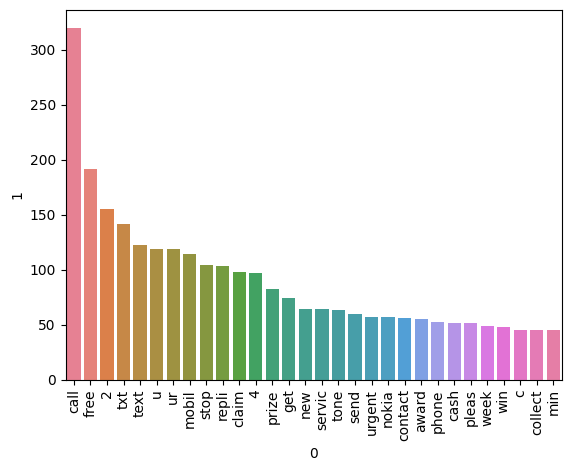

In [46]:
sns.barplot(data=df,x=pd.DataFrame(Counter(spam_collec).most_common(30))[0],y=pd.DataFrame(Counter(spam_collec).most_common(30))[1],hue=pd.DataFrame(Counter(spam_collec).most_common(30))[0])
plt.xticks(rotation=90)
plt.show()

In [47]:
ham_collec=[]
for i in df[df['target']==0]['Transformed_text'].tolist():
  for j in i.split():
    ham_collec.append(j)


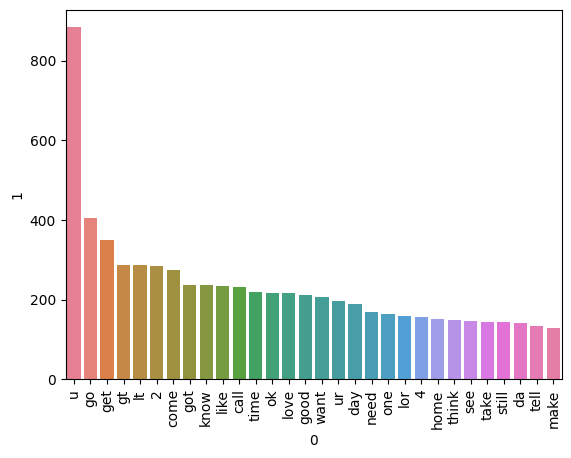

In [48]:
sns.barplot(data=df,x=pd.DataFrame(Counter(ham_collec).most_common(30))[0],y=pd.DataFrame(Counter(ham_collec).most_common(30))[1],hue=pd.DataFrame(Counter(ham_collec).most_common(30))[0])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# we will convert text messsages to no
# by text vectorizartion
# using bag of words

# text vectorization:
🔹 What is Text Vectorization?

Computers don’t understand text, they understand numbers.

Text vectorization = converting text into numerical vectors so ML models can process it.

🔹 Bag of Words (BoW)

The Bag of Words approach represents text as a “bag” (collection) of words, ignoring grammar and word order but keeping track of word frequency.

🛠 Steps:

Build a vocabulary of all unique words in the dataset.

For each document (sentence, message, etc.), count how many times each word from the vocabulary appears.

Represent that document as a vector of word counts.
- code
- from sklearn.feature_extraction.text import CountVectorizer

- corpus = ["I love machine learning",
          "Machine learning is fun",
          "I love fun"]

- cv = CountVectorizer()
- X = cv.fit_transform(corpus)

- print(cv.get_feature_names_out())   # Vocabulary
- print(X.toarray())      

In [91]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
# will only take most imp 3000 features or words

In [92]:
# here we also used bow
# x=cv.fit_transform(df['Transformed_text']).toarray()
# but better with tf idf
x=tfidf.fit_transform(df['Transformed_text']).toarray()

In [93]:
x.shape

(5169, 3000)

In [94]:
y=df['target'].values

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
#

In [97]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [98]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
# formula is same for all just multinomial is use for text based data
# gnb for continous data
# bnb for binary data

In [99]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [100]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [101]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# best model

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [81]:
# we will also use other ml algo to

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [103]:
lg=LogisticRegression()
svc=SVC(kernel='sigmoid',gamma=1.0)
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
knn=KNeighborsClassifier()
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [104]:
clfs={
    'LG':lg,
    'SVC':svc,
    'MNB':mnb,
    'DTC':dtc,
    'RFC':rfc,
    'KNN':knn,
    'ABC':abc,
}
clfs2={
     'BC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [105]:
def train_classi(clf,x_train,x_test,y_train,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [106]:
from sklearn.metrics import accuracy_score, precision_score

accuracy_list = []
precision_list = []

for name, clf in clfs.items():
    curr_acc, curr_prec = train_classi(clf, x_train, x_test, y_train, y_test)
    accuracy_list.append(curr_acc)
    precision_list.append(curr_prec)
    print(f'{name} accuracy is {curr_acc}')
    print(f'{name} precision is {curr_prec}')

LG accuracy is 0.9545454545454546
LG precision is 0.9789473684210527
SVC accuracy is 0.9758220502901354
SVC precision is 0.9747899159663865
MNB accuracy is 0.9709864603481625
MNB precision is 1.0
DTC accuracy is 0.9323017408123792
DTC precision is 0.8333333333333334
RFC accuracy is 0.9738878143133463
RFC precision is 0.9826086956521739
KNN accuracy is 0.9052224371373307
KNN precision is 1.0
ABC accuracy is 0.9216634429400387
ABC precision is 0.8202247191011236


In [107]:
scores=pd.DataFrame({'Name':clfs.keys(),'Accuracy':accuracy_list,'Precision':precision_list}).sort_values('Precision',ascending=False)

In [108]:
scores

,Name,Accuracy,Precision
2,MNB,0.970986,1.000000
5,KNN,0.905222,1.000000
4,RFC,0.973888,0.982609
0,LG,0.954545,0.978947
1,SVC,0.975822,0.974790
3,DTC,0.932302,0.833333
6,ABC,0.921663,0.820225


In [ ]:
 # so we will take mnb or nb

In [110]:
# model improvement added max_features in tf-idf
import pickle
pickle.dump(tfidf,open('vectorize.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [111]:
pickle.dump(transform_test,open('preprocessing.pkl','wb'))